## Essential Libraries

Let us begin by importing the essential Python Libraries.

> NumPy : Library for Numeric Computations in Python  
> SciPy : Built on NumPy, contains many high-level commands that aid with manipulating and visualizing data  
> Pandas : Library for Data Acquisition and Preparation  
> Matplotlib : Low-level library for Data Visualization  
> Seaborn : Higher-level library for Data Visualization  
> Scikitlearn : Comprehensive machine learning library with tools for classification, regression, clustering, etc  
> Statsmodels : Used for estimating and testing statistical models

In [2]:
# Basic Libraries
import numpy as np
import scipy
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import sklearn
import statsmodels.api as sm
import matplotlib.pyplot as plt # we only need pyplot
sns.set(style="whitegrid") # set the default Seaborn style for graphics

In [3]:
# Import dataset, using first column as index column
glassdoor_data = pd.read_csv('sg_companies_reviewsYJ.csv')

# Concatenating Pros and Cons
glassdoor_data['Overall Review'] = glassdoor_data['Pros'] + '. ' + glassdoor_data['Cons']

In [5]:
glassdoor_data.head()

,Company Name,Overall Rating,Review Date,Review Title,Job Title,Job Details,Location,Pros,Cons,Overall Review
0,Amazon,5,12-Feb-24,"Good pay, hard work",Area Manager II,"Former Employee, more than 3 years","Romulus, MI","Pay, autonomy, plenty of benefits",It was hard work in a warehouse. Many days of ...,"Pay, autonomy, plenty of benefits. It was hard..."
1,Amazon,5,10-Jan-16,You Get What You Put In,Anonymous Employee,Current Employee,"Seattle, WA","Really smart people, a lot of opportunity for ...",You have to be self motivated. NO ONE will hol...,"Really smart people, a lot of opportunity for ..."
2,Amazon,3,20-Feb-16,"Exciting Work, Abusive Culture",Senior Engineering Manager,"Current Employee, more than 8 years","Seattle, WA","Jeff Bezos and his ""S-Team"" are brilliant and ...","The management process is abusive, and I'm cur...","Jeff Bezos and his ""S-Team"" are brilliant and ..."
3,Amazon,4,17-Dec-13,"Can be amazing for some people, horrible for o...",Software Development Manager,"Current Employee, more than 3 years","Seattle, WA",Amazon is doing lot's of cool stuff...but lots...,- You're responsible for your own career progr...,Amazon is doing lot's of cool stuff...but lots...
4,Amazon,5,23-Feb-18,An Amazing Place to Work,Software Development Manager,"Current Employee, less than 1 year","Phoenix, AZ","I've been at Amazon for a month now, and I've ...","No cons, so far - seriously. Like I said, I'm ...","I've been at Amazon for a month now, and I've ..."


### Analysing ratings given by the employees in relation to their reviews

Can take a look at how low the rating has to be for the review to be mostly negative and similarly how high the rating had to be for the review to be mostly positive

In [6]:
glassdoor_data['Overall Rating'].describe()

count    10035.000000
mean         3.738615
std          1.237792
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: Overall Rating, dtype: float64

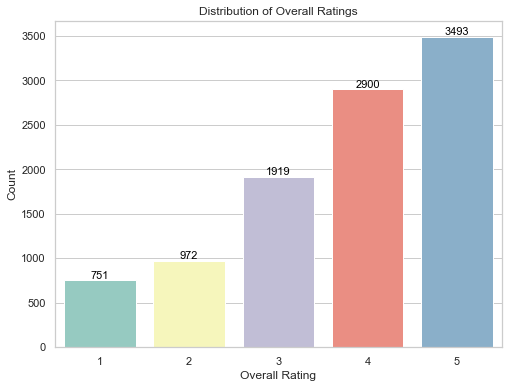

In [16]:
# Create the countplot
plt.figure(figsize=(8, 6)) # Adjust size if necessary
ax = sns.countplot(x='Overall Rating', data=glassdoor_data, palette="Set3")

# Add count values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

# Add title and labels
plt.title('Distribution of Overall Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Count')

# Show the plot
plt.show()


## Removing reviews that have <5 words

For Overall? or Pros and Cons?

Requires data to be cleaned first. e.g. data that is in different lines might have more words than 5 but the count messes up thanks to \r and \n characters

In [65]:
# Import dataset, using first column as index column
glassdoor_data = pd.read_csv('sg_companies_reviewsYJ.csv')

# Concatenating Pros and Cons
glassdoor_data['Overall Review'] = glassdoor_data['Pros'] + '. ' + glassdoor_data['Cons']

In [66]:
glassdoor_data['num_words_Pros'] = glassdoor_data.apply(lambda x: len(x['Pros'].split(" ")), axis=1)
glassdoor_data['num_words_Cons'] = glassdoor_data.apply(lambda x: len(x['Cons'].split(" ")), axis=1)
glassdoor_data['num_words_Overall'] = glassdoor_data.apply(lambda x: len(x['Overall Review'].split(" ")), axis=1)

In [67]:
print("Number of Pros with less than 5 words: ", len(glassdoor_data[glassdoor_data['num_words_Pros']<5]))
print("Number of Cons with less than 5 words: ", len(glassdoor_data[glassdoor_data['num_words_Cons']<5]))
print("Number of Overall Reviews with less than 5 words: ", len(glassdoor_data[glassdoor_data['num_words_Overall']<5]))

Number of Pros with less than 5 words:  567
Number of Cons with less than 5 words:  365
Number of Overall Reviews with less than 5 words:  237


In [68]:
# Edit accordingly to whichever criteria we wanna use to drop the rows
glassdoor_data.drop(glassdoor_data.loc[glassdoor_data['num_words_Overall']<5].index, inplace=True)